## BeerAdvocate: Descriptive Analysis and Processing

---

**Descriptive Analysis Summary of "users.csv"**

* **Missing values**: none, except for "location" that may contain "nan" (previously converted to None) and "joined" that may contain NaN (previously implictely converted to NaT).

<br>

* **users**:
  - 153'704 unique users.
  - $\approx$ 20.3% of users are of unknown location.
  - most users are located in English speaking countries. top 5 countries in terms of number of users:
  
  | country | wrt to all users | wrt users with known location |
  | :- | :-: | :-: |
  | United States | 73.6% | 92.4% |
  | Canada | 2.1% | 2.7% |
  | England | 0.5% | 0.6% | 
  | Australia | 0.3% | 0.4% |
  | Germany | 0.2% | 0.3% |

<br>

* **ratings**:
  - 8'393'032 ratings in total.
  - heavy-tailed distribution of the number of ratings per user.
  - 50% of users have at most 3 ratings.
  - the mean number of ratings $\approx 54.6$ is quite low while the standard deviation $\approx 252.38$ is very high.
  - most rtings are given by users located in English speaking countries. Top 5 countries in terms of the number of ratings: 

  | country | wrt to all users | wrt users with known location |
  | :- | :-: | :-: |
  | United States | 87% | 92.5% |
  | Canada | 3.2% | 3.4% |
  | England | 0.4% | 0.5% | 
  | Australia | 0.4% | 0.4% |
  | Sweden | 0.3% | 0.3% |

<br>

* **reviews**:
  - reviews in total.
  - heavy-tailed distribution of the number of reviews per user.
  - 50% of users have 0 reviews.
  - the mean number of reviews $\approx 16.84$ is quite low while the standard deviation $\approx 139.84$ is very high.
  - most reviews are given by users from English speaking countries (US, Canada, Australia, England). Top 5 countries in terms of the number of reviews:
  
  | country | wrt to all users | wrt users with known location |
  | :- | :-: | :-: |
  | United States | 86.5% | 89.8% |
  | Canada | 4.8% | 5% |
  | Australia | 1% | 1% | 
  | England | 0.8% | 0.8% |
  | Netherlands | 0.3% | 0.3% |

<br>

* **joined**:
  - earliest year of joining: 1996.
  - latest year of joining: 2017 (date of the end of the collection of data, which happened between 2001 and 2017).
  - there are only 2652 users with unknown joining date.
  - the yearly by month distribution of users joining the plateform is not disrupted throughout most of the years (starting 2001 until 2017). 

<br>

* **country**:
  - users are located in 145 different countries.


**Processing and Transformations Summary of "users.csv"**

- **Renaming Columns**: "nbr_ratings" to "n_ratings", "nbr_reviews" to "n_reviews", "user_id" to "uid", "user_name" to "username".
- **Converting Data Types**: "n_ratings", "n_reviews" to int & "username", "uid", "location" to str.
- **Converting "nan" to None**: in "location".
- **Creating an additional "country" column from "location"**: by extracting the country name from the location (example: "United States, Texas" location belongs to country "United States").
- **Converting the "joined" column values**: float values (time in seconds, reference is Jan.1st 1970 at 00:00) to pandas.Timestamp. Implicit conversion of NaN to NaT. 

In [1]:
from setup import dask_init, dask_shutdown
import dask.distributed as dd
import dask.dataframe as ddf

import pandas as pd
import numpy as np

import ingestion as ing
import processing as prc

import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

/home/farouk/anaconda3/envs/py3-9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**setup**

In [2]:
# PANDAS SETUP
pd.options.mode.use_inf_as_na = True

# DASK SETUP
client, cluster = dask_init()
cluster

LocalCluster(b080c965, 'tcp://127.0.0.1:37673', workers=4, threads=8, memory=7.66 GiB)

### BeerAdvocate - users.csv

**[I] Loading the Data**

In [3]:
users_cols = [
    "nbr_ratings",
    "nbr_reviews",
    "user_id",
    "user_name",
    "joined",
    "location"]

users_df = ing.read_csv(
    path=ing.build_path(folderind="ba", filename="users"),
    assume_missing=True,
    keepcols=users_cols,
    mode="eager")

users_df.head(5)

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820.0,465.0,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521.0,2504.0,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797.0,1143.0,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31.0,31.0,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604.0,604.0,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


**[III] Descriptive Statistics & Distributions**

In [4]:
users_df.describe()

,nbr_ratings,nbr_reviews,joined
count,153704.000000,153704.000000,1.510520e+05
mean,54.605163,16.847876,1.357238e+09
std,252.388790,139.846706,9.195131e+07
min,1.000000,0.000000,8.407944e+08
25%,1.000000,0.000000,1.303121e+09
50%,3.000000,0.000000,1.391944e+09
75%,16.000000,2.000000,1.417691e+09
max,12046.000000,8970.000000,1.501495e+09


user_id

In [5]:
print("Is any user ID missing ?")
users_df.user_id.isna().any()

Is any user ID missing ?


False

In [6]:
print("How many unique users ?")
n_users = len(users_df.user_id.unique())
n_users

How many unique users ?


153704

location

In [7]:
print("Is there a user with unknown location ?")
users_df.location.isna().any()

Is there a user with unknown location ?


True

In [8]:
print("How many users have an unknown location ?")
n_users_unknown_loc = users_df.location.isna().sum()
n_users_unknown_loc

How many users have an unknown location ?


31279

In [9]:
print("What fraction do these users make up of the total number of users ?")
n_users_unknown_loc / n_users

What fraction do these users make up of the total number of users ?


0.2035015354187269

In [10]:
print("Where are all users located ?")
users_df["country"] = users_df.location.apply(prc.to_none_ifnot_str).apply(prc.get_country)
all_countries = users_df.country[users_df.country.notnull()].unique()
all_countries.sort()
all_countries

Where are all users located ?


array(['Afghanistan', 'Albania', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Aotearoa',
       'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Bouvet Island', 'Brazil',
       'British Indian Ocean Territory', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Canada', 'Cayman Islands', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'England', 'Equatorial Guinea', 'Estonia',
       'Ethiopia', 'Faroe Islands', 'Fiji Islands', 'Finland', 'France',
       'Germany', 'Gibraltar', 'Greece', 'Guam', 'Guatemala', 'Guernsey',
       'Haiti', 'Heard and McDonald Islands', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Isle of Man', 

In [11]:
print("How many different locations are there ?")
len(all_countries)

How many different locations are there ?


145

<AxesSubplot:title={'center':'Number of Users Across All Countries except the US'}, xlabel='country (represented via its index entry)', ylabel="users' count">

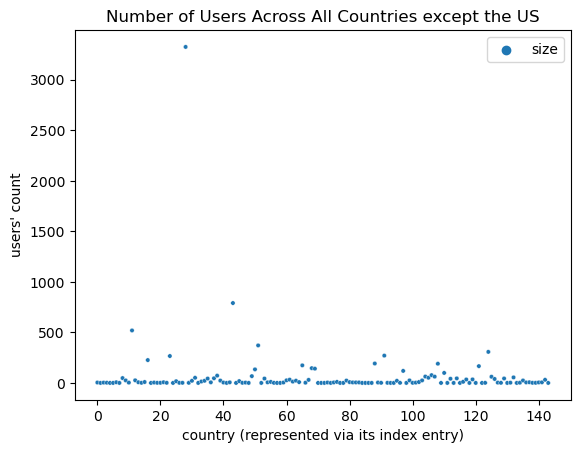

In [12]:
n_users_per_country_wout_us = users_df[\
    (~users_df.country.isna()) &\
    (users_df.country != "United States")].groupby("country", as_index=False).size()

fig, ax = plt.subplots(1,1)
ax.set_title("Number of Users Across All Countries except the US")
ax.set_ylabel("users' count")
ax.set_xlabel("country (represented via its index entry)")
sns.scatterplot(data=n_users_per_country_wout_us, ax=ax, s=10)

In [13]:
print("List of countries with at least 100 users")
n_users_per_country = users_df.groupby("country", as_index=False).size()
countries_atleast_100users = n_users_per_country[n_users_per_country["size"] >= 100]
countries_atleast_100users["users_frac"] = countries_atleast_100users["size"] / users_df.location[~ users_df.location.isna()].size
countries_atleast_100users = countries_atleast_100users.sort_values(by="size", ascending=False)
countries_atleast_100users

List of countries with at least 100 users


/tmp/ipykernel_2829/3478117932.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_atleast_100users["users_frac"] = countries_atleast_100users["size"] / users_df.location[~ users_df.location.isna()].size


,country,size,users_frac
137,United States,113223,0.924836
28,Canada,3324,0.027151
43,England,791,0.006461
11,Australia,520,0.004247
51,Germany,372,0.003039
124,Sweden,308,0.002516
91,Netherlands,271,0.002214
23,Brazil,267,0.002181
16,Belgium,227,0.001854
88,Mexico,193,0.001576


In [14]:
# compute number of users per state (US only)
n_users_per_state = users_df[users_df.country == "United States"].groupby("location").size()

# keep only states with at least 100 users
min_n_users = 1000
n_users_per_state_top = n_users_per_state[n_users_per_state >= min_n_users]

# print the number of states with less than 100 users
print("Number of states with less than {0} users: {1}".format(min_n_users,
    n_users_per_state.size - n_users_per_state_top.size))


Number of states with less than 1000 users: 21


<AxesSubplot:title={'center':'Distribution of number of users per state (US only) with at least 1000 users'}, xlabel='location', ylabel='nbr_users'>

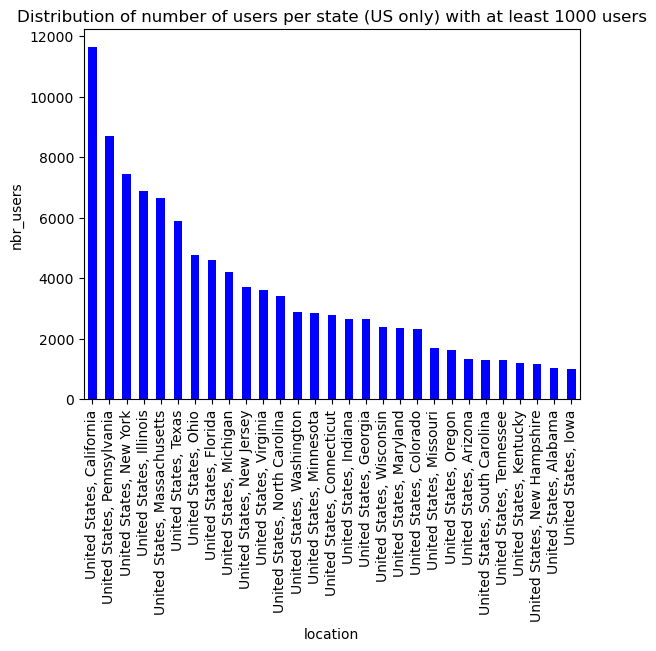

In [15]:
# sort states by number of users
#n_users_per_state_100 = n_users_per_state_100.sort_values(ascending=False)

fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of number of users per state (US only) with at least {0} users".format(min_n_users))
ax.set_ylabel("nbr_users")
ax.set_xlabel("state")

n_users_per_state_top.sort_values(ascending=False).plot.bar(ax=ax, color="blue")

In [16]:
# compute number of ratings per state (US only)
users_per_state = users_df[users_df.country == "United States"].groupby("location")
nb_rating_per_state = users_per_state.aggregate({"nbr_ratings": np.sum}).squeeze()

<AxesSubplot:title={'center':'Distribution of number of number of ratings per state (US only)'}, xlabel='location', ylabel='nbr_ratings'>

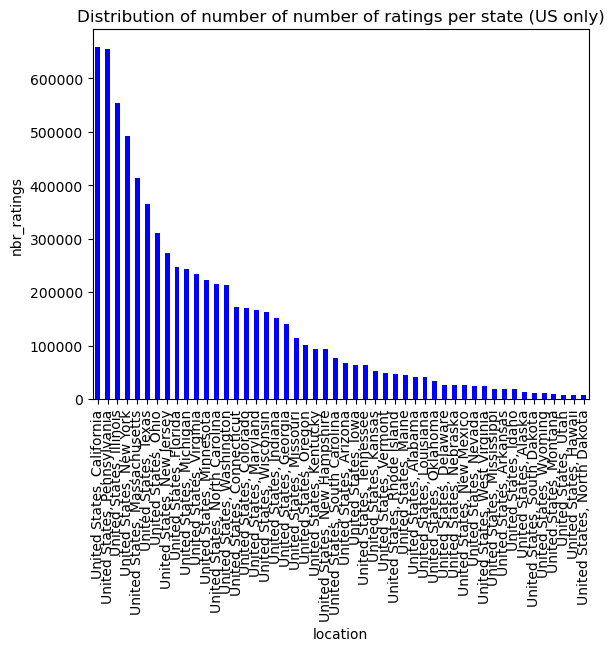

In [17]:
fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of number of number of ratings per state (US only)")
ax.set_ylabel("nbr_ratings")
ax.set_xlabel("state")
nb_rating_per_state.sort_values(ascending=False).plot.bar(ax=ax, color="blue")

<AxesSubplot:title={'center':'Distribution of ratio of number of ratings per number of users ofr each state (US only)'}, xlabel='location', ylabel='nbr_ratings'>

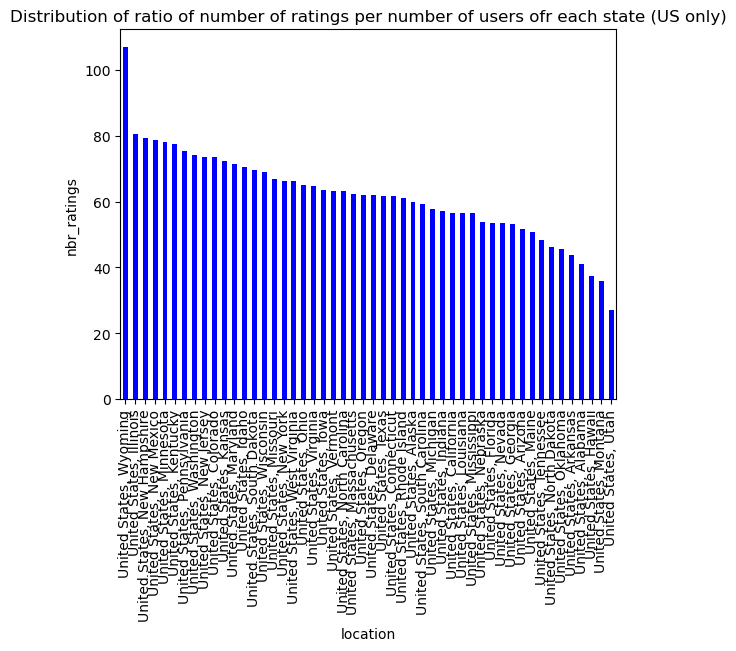

In [18]:
# number ratings divided by number of users for each state
fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of ratio of number of ratings per number of users ofr each state (US only)")
ax.set_ylabel("nbr_ratings")
ax.set_xlabel("state")
n_rating_state_ratio = nb_rating_per_state / n_users_per_state
n_rating_state_ratio.sort_values(ascending=False).plot.bar(ax=ax, color="blue")

In [21]:
ratings_ddf = prc.ratings_pipeline(persist=False, users_persisted=True)
ratings_ddf.head(5)

,date,bid,uid,appearance,aroma,palate,taste,overall,rating,has_review,review
0,2015-08-20 10:00:00,142544,nmann08.184925,3.25,2.75,3.25,2.75,3.00,2.88,True,From a bottle; pours a piss yellow color with ...
1,2015-11-14 11:00:00,120824,nmann08.184925,4.00,3.50,3.75,3.50,3.50,3.56,False,None
2,2011-11-18 11:00:00,47581,nmann08.184925,NaN,NaN,NaN,NaN,NaN,4.50,False,None
3,2013-05-03 10:00:00,93113,nmann08.184925,NaN,NaN,NaN,NaN,NaN,3.75,False,None
4,2015-01-24 11:00:00,875,nmann08.184925,4.00,3.50,3.75,4.00,3.75,3.81,False,None


n_ratings

In [22]:
print("Is there a user with unknown number of ratings ?")
users_df.nbr_ratings.isna().any()

Is there a user with unknown number of ratings ?


False

In [23]:
print("Total number of ratings")
total_n_ratings = users_df.nbr_ratings.sum()
total_n_ratings

Total number of ratings


8393032.0

<AxesSubplot:title={'center':'Distribution of Ratings Across All Users'}, xlabel='ratings', ylabel='occurences'>

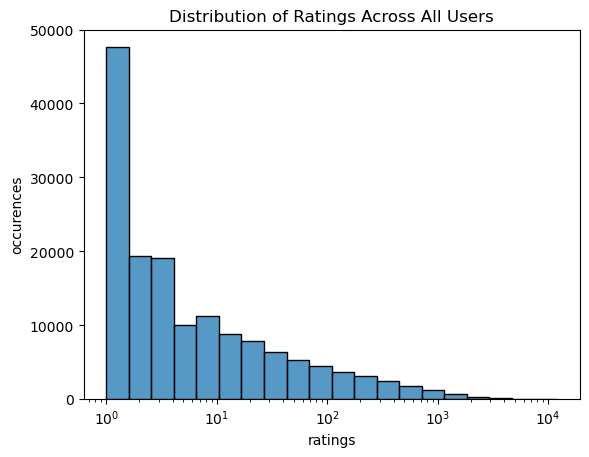

In [24]:
fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of Ratings Across All Users")
ax.set_ylabel("occurences")
ax.set_xlabel("ratings")
sns.histplot(data=users_df, x="nbr_ratings", ax=ax, bins=20, log_scale=True)


<AxesSubplot:title={'center':'Number of Ratings Across All Countries except the US'}, xlabel='country (represented by its entry index)', ylabel="ratings' count">

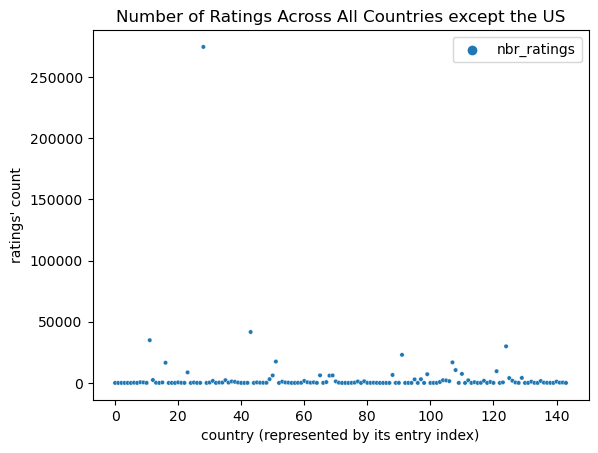

In [26]:
n_ratings_per_country = users_df[\
    (~users_df.country.isna()) &\
    (users_df.country != "United States")].groupby("country", as_index=False).agg({"nbr_ratings": np.sum})

fig, ax = plt.subplots(1,1)
ax.set_title("Number of Ratings Across All Countries except the US")
ax.set_ylabel("ratings' count")
ax.set_xlabel("country (represented by its entry index)")
sns.scatterplot(data=n_ratings_per_country, ax=ax, s=10)

In [28]:
print("List of countries with at least 10'000 ratings")
min_n_ratings = 10_000
n_ratings_per_country = users_df[~users_df.country.isna()].groupby("country", as_index=False).agg({"nbr_ratings": np.sum})
countries_atleast_10Kratings = n_ratings_per_country[n_ratings_per_country.nbr_ratings >= min_n_ratings]
countries_atleast_10Kratings["ratings_frac"] = countries_atleast_10Kratings.nbr_ratings / users_df[~users_df.country.isna()].nbr_ratings.sum()
countries_atleast_10Kratings = countries_atleast_10Kratings.sort_values(by="nbr_ratings", ascending=False)
countries_atleast_10Kratings

List of countries with at least 10'000 ratings


/tmp/ipykernel_2829/3105440594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_atleast_10Kratings["ratings_frac"] = countries_atleast_10Kratings.nbr_ratings / users_df[~users_df.country.isna()].nbr_ratings.sum()


,country,nbr_ratings,ratings_frac
137,United States,7303870.0,0.925389
28,Canada,274512.0,0.034780
43,England,41597.0,0.005270
11,Australia,34915.0,0.004424
124,Sweden,29914.0,0.003790
91,Netherlands,22952.0,0.002908
51,Germany,17460.0,0.002212
107,Romania,16823.0,0.002131
16,Belgium,16478.0,0.002088
108,Russia,10521.0,0.001333


n_reviews

In [29]:
print("Is there a user with unknown number of reviews ?")
users_df.nbr_reviews.isna().any()

Is there a user with unknown number of reviews ?


False

In [30]:
print("Total number of reviews")
total_n_reviews = users_df.nbr_reviews.sum()
total_n_reviews

Total number of reviews


2589586.0

/home/farouk/anaconda3/envs/py3-9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:title={'center':'Distribution of Reviews Across All Users'}, xlabel='reviews', ylabel='occurences'>

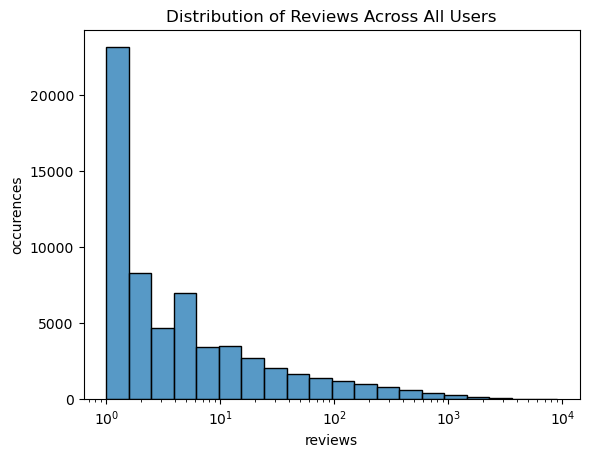

In [31]:
fig, ax = plt.subplots(1,1)
ax.set_title("Distribution of Reviews Across All Users")
ax.set_ylabel("occurences")
ax.set_xlabel("reviews")
sns.histplot(data=users_df, x="nbr_reviews", ax=ax, bins=20, log_scale=True)

In [33]:
print("List of countries with at least 5'000 reviews")
min_n_reviews = 5_000
n_reviews_per_country = users_df[~users_df.country.isna()].groupby("country", as_index=False).agg({"nbr_reviews": np.sum})
countries_atleast_5Kreviews = n_reviews_per_country[n_reviews_per_country.nbr_reviews >= min_n_reviews]
countries_atleast_5Kreviews["reviews_frac"] = countries_atleast_5Kreviews.nbr_reviews /\
    users_df.nbr_reviews[~users_df.country.isna()].sum()
countries_atleast_5Kreviews = countries_atleast_5Kreviews.sort_values(by="nbr_reviews", ascending=False)
countries_atleast_5Kreviews

List of countries with at least 5'000 reviews


/tmp/ipykernel_2829/399591790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_atleast_5Kreviews["reviews_frac"] = countries_atleast_5Kreviews.nbr_reviews /\


,country,nbr_reviews,reviews_frac
137,United States,2241334.0,0.898518
28,Canada,126591.0,0.050748
11,Australia,25947.0,0.010402
43,England,21017.0,0.008425
91,Netherlands,9740.0,0.003905
124,Sweden,9067.0,0.003635
51,Germany,8234.0,0.003301


joined

In [34]:
print("Is there any missing joining date ?")
users_df.joined.isna().any()

Is there any missing joining date ?


True

In [35]:
print("How many users have unknown joining date ?")
users_df.joined.isna().sum()

How many users have unknown joining date ?


2652

**[III] Data Processing and Transformation**

In [37]:
users_ddf = prc.users_pipeline(persist=True)

joined

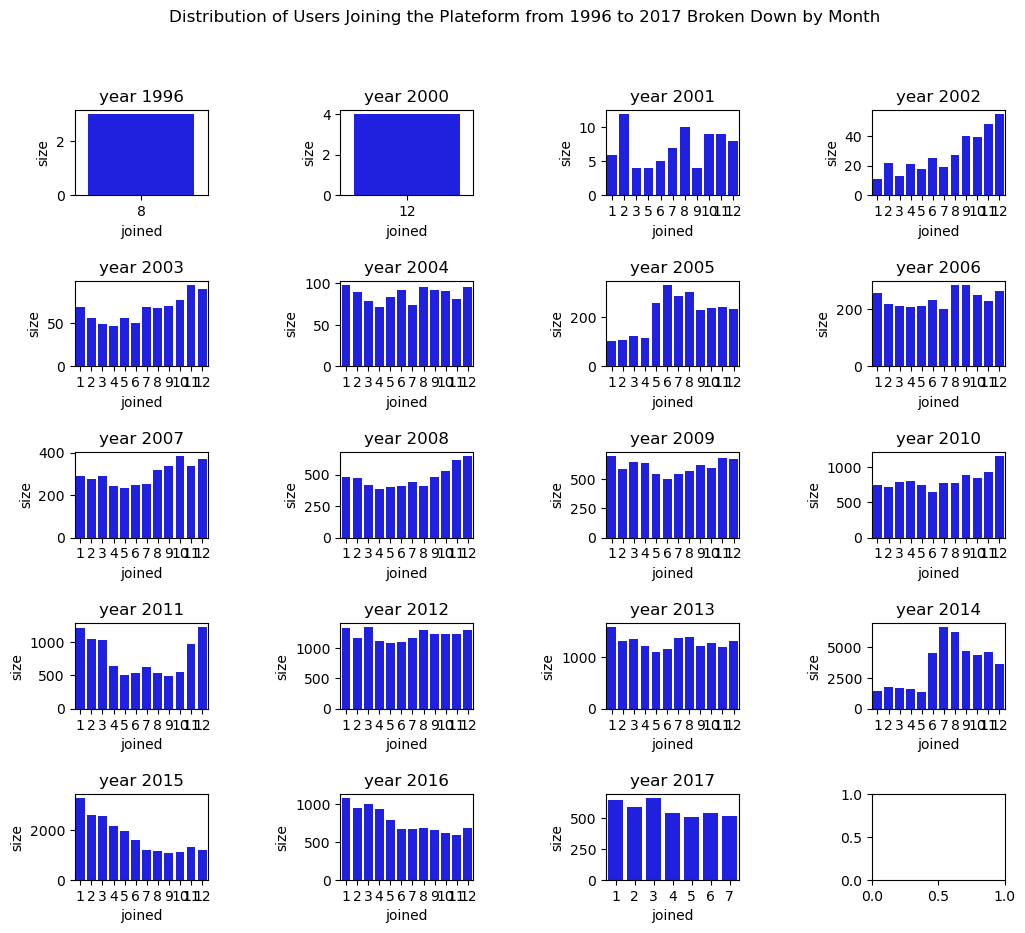

In [47]:
fig, axs = plt.subplots(5, 4, figsize=(12,10))
plt.subplots_adjust(wspace=1, hspace=1)
fig.suptitle("Distribution of Users Joining the Plateform from 1996 to 2017 Broken Down by Month")
users_ddf = users_ddf.compute()
users_joined_by_year = users_ddf.groupby(users_ddf.joined.dt.year, as_index=False)

for i, (year, by_year) in enumerate(users_joined_by_year):
    a = int(i/4); b = i % 4
    ax = axs[a][b]
    ax.set_title("year %d"%(year))
    users_joined_by_month = by_year.groupby(by_year.joined.dt.month, as_index=False).size()
    sns.barplot(data=users_joined_by_month, x="joined", y="size", color="blue", ax=ax, orient="v")

Dask shutdown

In [48]:
dask_shutdown(client)